# Web Scraping in imdb for Top 7 by Rating
## Create by Reza Lutfi Ismail 

Pada kasus ini, saya melakukan penarikan data via web dengan menggunakan beautifulsoup. Dimana, data yang saya gunakan yaitu dari imdb.com untuk mengetahui informasi mengenai daftar film/movies dan popularitasnya yang telah dirilis pada tahun 2019. 

Dalam pengerjaan proyek ini, saya menggunakan bahasa pemrograman python, diikuti dengan library BeautifulSoup untuk scraping data, dan data wrangling serta data visualisasi dengan menggunakan pandas.  

## Untuk memulai pengerjaan ini, didahului dengan menginstall library dibawah pada environment
- beautifulSoup4
- pandas
- matplotlibs

**Untuk mengambil data pada URL yang ingin digunakan, diawali dengan meng-import library requests (diinstal di environment) dan diikuti dengan fungsi .get() pada URL**

In [36]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31', verify=False)
url_get

<Response [200]>

## Scraping 

**Setelah me-requests URL, dilakukan perubahan struktur data dari yang awalnya berbentuk HTML yang complex menjadi object python yang nantinya bisa kita olah untuk scraping data. perubahan ini dapat dilakukan dengan meng-import Beautifulsoup dari bs4**

In [37]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


**Untuk mengintip HTML yang sudah kita , bisa dilakukan printing dengan jumlah 1045 character**

In [38]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

**Untuk menentukan area yang ingin kita scraping, kita dapat memilah 'div' pada HTML yang terdapat pada site tersebut untuk meringkas proses scraping. dalam kasus ini, saya memilih div dengan class='lister-item-content'. dikarenakan, semua informasi mengenai pertanyaan pada projek ini tersedia pada 'div' tersebut**


<img src='asset/SC.png'>

**Kemudian, saya membuat sebuah objek yaitu 'table', dimana objek tersebut berisikan semua 'div' pada class='lister-item-content'. objek inilah yang nantinya akan menjadi referensi untuk mencari judul, rating, metascore dan votes**

In [39]:
table = soup.find_all('div', attrs={'class':'lister-item-content'})
table[2]

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">3.</span>
<a href="/title/tt8946378/">Knives Out</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>
<p class="text-muted">
<span class="certificate">17+</span>
<span class="ghost">|</span>
<span class="runtime">130 min</span>
<span class="ghost">|</span>
<span class="genre">
Comedy, Crime, Drama            </span>
</p>
<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="7.9" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>7.9</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt8946378" id="urv_tt8946378">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt8946378">
<div class="rating rating-list

**Untuk mencari semua data mengenai informasi judul, rating, votes dan metascore, saya menggunakan algoritma for pada objek table. pada algoritma ini, akan dilakukan proses looping sehingga semua data dapat ditampilkan**

In [40]:
temp = []

for a in table:
    # .text untuk menampilkan format text
    judul = a.find('a').text 
    # .text.strip() untuk menampilkan format text dan removing bentuk whitespace, sehingga data menjadi bersih
    rating = a.find('div', attrs={'class':'inline-block ratings-imdb-rating'}).text.strip()
    votes = a.find('span', attrs={'name':'nv'}).text.strip()
    metascore = a.find('span',attrs={'class':'metascore favorable'})
    # untuk melakukan pengkondisian jika hasil metascore adalah selain None, maka dilakukan chaining dengan .text.strip()
    if metascore != None: 
        metascore = metascore.text.strip()
    # untuk menampilkan pada bentuk list
    temp.append((judul,rating,metascore,votes))
temp

[('The Umbrella Academy', '8.0', None, '113,356'),
 ('The Boys', '8.7', None, '157,181'),
 ('Knives Out', '7.9', '82', '361,198'),
 ('Watchmen', '8.1', None, '74,666'),
 ('Euphoria', '8.3', None, '44,624'),
 ('In the Dark', '7.4', None, '4,889'),
 ('Doom Patrol', '8.0', None, '28,509'),
 ('For All Mankind', '7.5', None, '9,481'),
 ('The Mandalorian', '8.7', None, '182,086'),
 ('The Gentlemen', '7.9', None, '170,532'),
 ('Hanna', '7.5', None, '22,581'),
 ('The Witcher', '8.2', None, '264,256'),
 ('Once Upon a Time... in Hollywood', '7.7', '83', '498,716'),
 ('Yes, God, Yes', '5.9', '71', '1,988'),
 ('His Dark Materials', '7.9', None, '36,745'),
 ('Joker', '8.5', None, '838,328'),
 ('Gisaengchung', '8.6', '96', '458,149'),
 ('After', '5.4', None, '29,732'),
 ('Motherless Brooklyn', '6.8', None, '33,370'),
 ('Avengers: Endgame', '8.4', '78', '746,233'),
 ('Ford v Ferrari', '8.1', '81', '243,956'),
 ('What We Do in the Shadows', '8.5', None, '28,761'),
 ('How to Sell Drugs Online (Fast)', 

## Data Wrangling

**Setelah semua data didapat, dilakukan data wrangling dengan menggunakan pandas. dimana output pada proses ini adalah untuk menyajikan data kedalam bentuk data frame dan merubah type menjadi lebih sesuai**

** Untuk mengubah data menjadi bentuk dataframe, dapat menggunakan pd.DataDrame() dan di assign pada objek df. lalu sorting kolom rating secara descending untuk langsung mengetahui film dengan judul yang memiliki rating tertinggi**

In [41]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('judul','rating','metascore','votes')).sort_values(by='rating',ascending=False)
df

,judul,rating,metascore,votes
34,Chernobyl,9.4,None,"486,119"
8,The Mandalorian,8.7,None,"182,086"
1,The Boys,8.7,None,"157,181"
16,Gisaengchung,8.6,96,"458,149"
21,What We Do in the Shadows,8.5,None,"28,761"
15,Joker,8.5,None,"838,328"
23,The Morning Show,8.4,None,"39,393"
19,Avengers: Endgame,8.4,78,"746,233"
36,Sex Education,8.3,None,"139,552"
4,Euphoria,8.3,None,"44,624"


** Setelah didapat bentuk dataframe, dilakukan perubahan format data menjadi lebih sesuai pada kolom rating, metascore, dan votes**

In [42]:
df['rating'] = df['rating'].astype('float64') 
df['metascore'] =pd.to_numeric(df['metascore'], errors='coerce') # memaksa untuk menampilkan semua data yang telah diubah, termasuk None
df['votes'] = df['votes'].str.replace(',', '.').astype(float) # melakukan perubahan bentuk koma menjadi titik, dan pengubahan bentuk data menjadi float

**Setelah diubah, kita dapat check type data pada data frame dengan attribute .dtypes**

In [43]:
df.dtypes

judul         object
rating       float64
metascore    float64
votes        float64
dtype: object

**Untuk merapihkan data frame dengan mengurutkan index, kita dapat menggunakan method .reset_index() dan menghilangkan kolom index dengan method .drop()**

In [44]:
df = df.reset_index().drop(columns='index')
df

,judul,rating,metascore,votes
0,Chernobyl,9.4,NaN,486.119
1,The Mandalorian,8.7,NaN,182.086
2,The Boys,8.7,NaN,157.181
3,Gisaengchung,8.6,96.0,458.149
4,What We Do in the Shadows,8.5,NaN,28.761
5,Joker,8.5,NaN,838.328
6,The Morning Show,8.4,NaN,39.393
7,Avengers: Endgame,8.4,78.0,746.233
8,Sex Education,8.3,NaN,139.552
9,Euphoria,8.3,NaN,44.624


## Visualiasi Data

**Setelah bentuk data sudah siap, maka dilakukan plot. pada projek ini, saya plot kedalam bentuk bar dikarenakan kita akan melakukan komparasi rating pada masing-masing film 7 terbaik pada tahun 2019**

Tahapannya adalah

- subset terlebih dahulu kolom yang akan kita plot (judul & rating)
- jadikan kolom judul sebagai index 
- ambil 7 film terbaik menggunakan method .head()
- lakukan sorting plot menggunakan method .sort_values() pada kolom rating, agar bar plot terurut dari atas ke bawah
- plot bar dengan menggunakan method .bar()

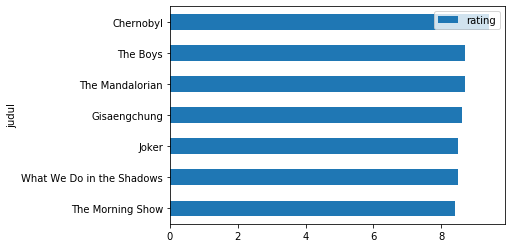

In [34]:
df[['judul','rating']].set_index('judul').head(7).sort_values(by='rating',ascending=True).plot(kind='barh')